In [1]:
import numpy as np
import pandas as pd
from math import isnan
import re
import matplotlib.pyplot as plt
from ape_producer.geom_reader import create_geom_df
from ape_producer.parse_report import make_cov_objects
from ape_producer.sign_conventions import signConventions, square_coordinates
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_rows', 500)

In [2]:
def select_sectors(df, wheel, station):
    return df[(df.wheel==wheel) & (df.station==station)]

In [3]:
xmlFileAlign_new_2 = 'data/SM_10_6_01_2.xml'
xmlFileAlign_new_4 = 'data/SM_10_6_01_4.xml'
xmlFileAlign_new_8 = 'data/SM_10_6_01_8.xml'
xmlFileAlign_new_16 = 'data/SM_10_6_01_16.xml'
xmlFileAlign_new_31 = 'data/SM_10_6_01_31.xml'
xmlFileAlign_new_62 = 'data/SM_10_6_01_62.xml'
xmlFileAlign_new_125 = 'data/SM_10_6_01_125.xml'
xmlFileAlign_new_250 = 'data/SM_10_6_01_250.xml'
xmlFileAlign_new_500 = 'data/SM_10_6_01_500.xml'

In [4]:
RyanData = pd.DataFrame()
RyanData = pd.read_csv("data/nmuon_hesse_df.csv") 
RyanData= RyanData.astype(float)
RyanData = RyanData.apply(pd.to_numeric)

In [5]:
aligned_geom_dt_2, aligned_geom_csc_2  = create_geom_df(xmlFileAlign_new_2)
aligned_geom_dt_4, aligned_geom_csc_4  = create_geom_df(xmlFileAlign_new_4)
aligned_geom_dt_8, aligned_geom_csc_8  = create_geom_df(xmlFileAlign_new_8)
aligned_geom_dt_16, aligned_geom_csc_16  = create_geom_df(xmlFileAlign_new_16)
aligned_geom_dt_31, aligned_geom_csc_31  = create_geom_df(xmlFileAlign_new_31)
aligned_geom_dt_62, aligned_geom_csc_62  = create_geom_df(xmlFileAlign_new_62)
aligned_geom_dt_125, aligned_geom_csc_125  = create_geom_df(xmlFileAlign_new_125)
aligned_geom_dt_250, aligned_geom_csc_250 = create_geom_df(xmlFileAlign_new_250)
aligned_geom_dt_500, aligned_geom_csc_500  = create_geom_df(xmlFileAlign_new_500)

In [6]:
aligned_geom_dt_2['njobs'] = 2
aligned_geom_dt_4['njobs'] = 4
aligned_geom_dt_8['njobs'] = 8
aligned_geom_dt_16['njobs'] = 16
aligned_geom_dt_31['njobs'] = 31
aligned_geom_dt_62['njobs'] = 62
aligned_geom_dt_125['njobs'] = 125
aligned_geom_dt_250['njobs'] = 250
aligned_geom_dt_500['njobs'] = 500

In [7]:
ReturnsDF=pd.DataFrame()
for i in range(-2, 3):
    for j in range (1, 5):
        xpd = pd.DataFrame()
        xpd = {'returns:':'500','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_500, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_500, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_500, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_500, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_500, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_500, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'250','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_250, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_250, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_250, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_250, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_250, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_250, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'125','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_125, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_125, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_125, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_125, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_125, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_125, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'62','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_62, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_62, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_62, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_62, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_62, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_62, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'31','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_31, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_31, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_31, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_31, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_31, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_31, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'16','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_16, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_16, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_16, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_16, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_16, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_16, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'8','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_8, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_8, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_8, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_8, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_8, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_8, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'4','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_4, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_4, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_4, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_4, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_4, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_4, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        xpd = {'returns:':'2','wheel':i, 'station':j, 'x std':select_sectors(aligned_geom_dt_2, i, j).std()[3],'y std':select_sectors(aligned_geom_dt_2, i, j).std()[4],'z std':select_sectors(aligned_geom_dt_2, i, j).std()[5],'phix std':select_sectors(aligned_geom_dt_2, i, j).std()[6],'phiy std':select_sectors(aligned_geom_dt_2, i, j).std()[7], 'phiz std':select_sectors(aligned_geom_dt_2, i, j).std()[8] }
        ReturnsDF=ReturnsDF.append(xpd,ignore_index=True)
        ReturnsDF=ReturnsDF[["returns:", "wheel", 'station', 'x std', 'y std', 'z std', 'phix std', 'phiy std', 'phiz std']]

        ReturnsDF = ReturnsDF.apply(pd.to_numeric)


In [8]:
Result = pd.merge(RyanData, ReturnsDF)

In [9]:
def DTPlot(wheel, station, option):
    fig, DTPlot = plt.subplots()
    
    DTPlot.plot(0, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 2 ) ][option][0], 'ro', label = '2 files')
    DTPlot.plot(1, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 4 ) ][option][1], 'ro', label = '4 files')
    DTPlot.plot(2, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 8 ) ][option][2], 'ro', label = '8 files')
    DTPlot.plot(3, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 16 ) ][option][3], 'ro', label = '16 files')
    DTPlot.plot(4, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 31 ) ][option][4], 'ro', label = '31 files')
    DTPlot.plot(5, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 62 ) ][option][5], 'ro', label = '62 files')
    DTPlot.plot(6, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 125 ) ][option][6], 'ro', label = '125 files')
    DTPlot.plot(7, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 250 ) ][option][7], 'ro', label = '250 files')
    DTPlot.plot(8, Result[(Result.wheel == wheel) & (Result.station == station) & (Result['returns:'] == 500) ][option][8], 'ro', label = '500 files')
    ax = plt.gca()
    ax.set_xticks([0,1,2,3,4,5,6,7,8] )
    ax.set_xticklabels(["2","4","8","16","31","62","125","250","500"])
    

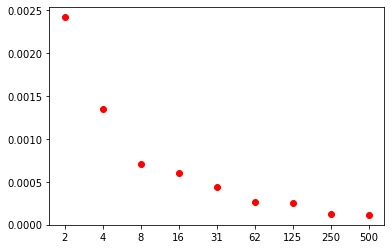

In [10]:
#nMuons_mean
#nMuons_std
#hesse_unc_x
#hesse_unc_y
#hesse_unc_z
#hesse_unc_phix
#hesse_unc_phiy
#hesse_unc_phiz
#x std
#y std
#z std
#phix std
#phiy std
#phiz std
DTPlot(-2,1, "phiz std")